In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import timedelta, date

In [28]:
from electricity_price_predictor.data import get_data, get_updated_weather, get_weather_past

In [93]:
df = get_updated_weather()

In [40]:
past, future = get_data()

In [42]:
future

,wind_speed,humidity,temp,holiday,weekend
2020-11-24 11:00:00,6.487594,93.302050,9.836759,0,0
2020-11-25 11:00:00,4.543527,90.476605,6.670843,0,0
2020-11-26 11:00:00,3.650024,89.493593,7.865711,0,0
2020-11-27 11:00:00,0.978093,90.793030,3.171532,0,0
2020-11-28 11:00:00,1.744945,88.463485,1.555137,0,1
2020-11-29 11:00:00,1.596882,85.931288,1.530622,0,1
2020-11-30 11:00:00,3.226847,93.669427,1.699924,0,0
2020-12-01 11:00:00,NaN,NaN,NaN,0,0
2020-12-02 11:00:00,NaN,NaN,NaN,0,0
2020-12-03 11:00:00,NaN,NaN,NaN,0,0


In [50]:
from electricity_price_predictor.sarimax import sarimax_forecast, plot_forecast, plot_sarima_forecast, plot_sarima_forecast_48

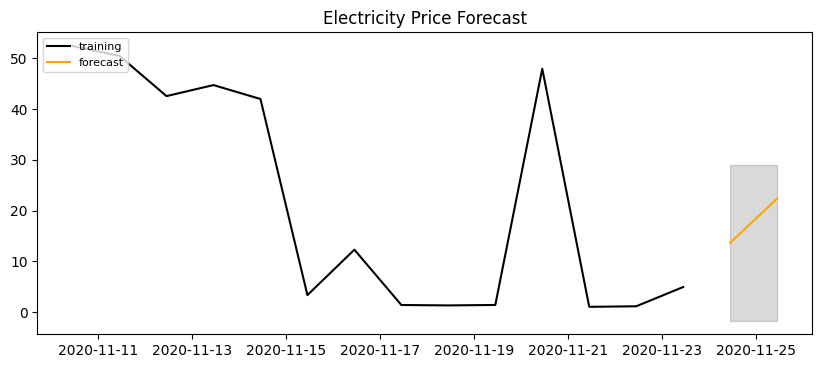

In [54]:
plot_sarima_forecast()

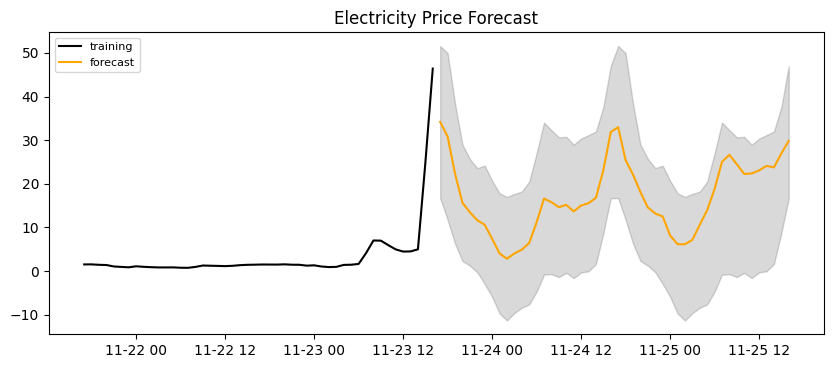

In [56]:
plot_sarima_forecast_48()